## Example of recovery inference with $\tt{bajes}$

Following the $\tt{inf\_tutorial.ipynb}$ instructures, here there are the commands for the recovery analisis with injected data in $\tt{example\_injectionXkn\_recoveryBajes\_GrossmanModel/Injected\_data}$ folder.

These commands have to be run from terminal.

Setup command:

`bajes_setup --outdir ./run --tag kn --t-gps 1187008857 --kn-approx GrossmanKBP-1-isotropic --use-mag-dev --mag-folder ./example_injectionXkn_recoveryBajes_GrossmanModel/Injected_data --lambda 445e-9 --lambda 475e-9 --lambda 658e-9 --lambda 775e-9 --lambda 850e-9 --lambda 2190e-9 --band 445 --band 475 --band 658 --band 775 --band 850 --band 2190 --use-dereddening --mej-max 1e-1 --mej-min 0 --vel-max 0.333 --vel-min 1e-3 --opac-max 30 --opac-min 0.1 --fix-name eps0 --fix-value 1e18 --fix-name eps_time --fix-value 1.3 --tshift-max 25 --tshift-min 24 --dist-min 10 --dist-max 75`

Inference command:

`python -m bajes -o ./run -I ./run/inf.pkl --checkpoint 1000 --engine dynesty --nlive 5000 --maxmcmc 15000 --tol 0.1 --seed 1234567`

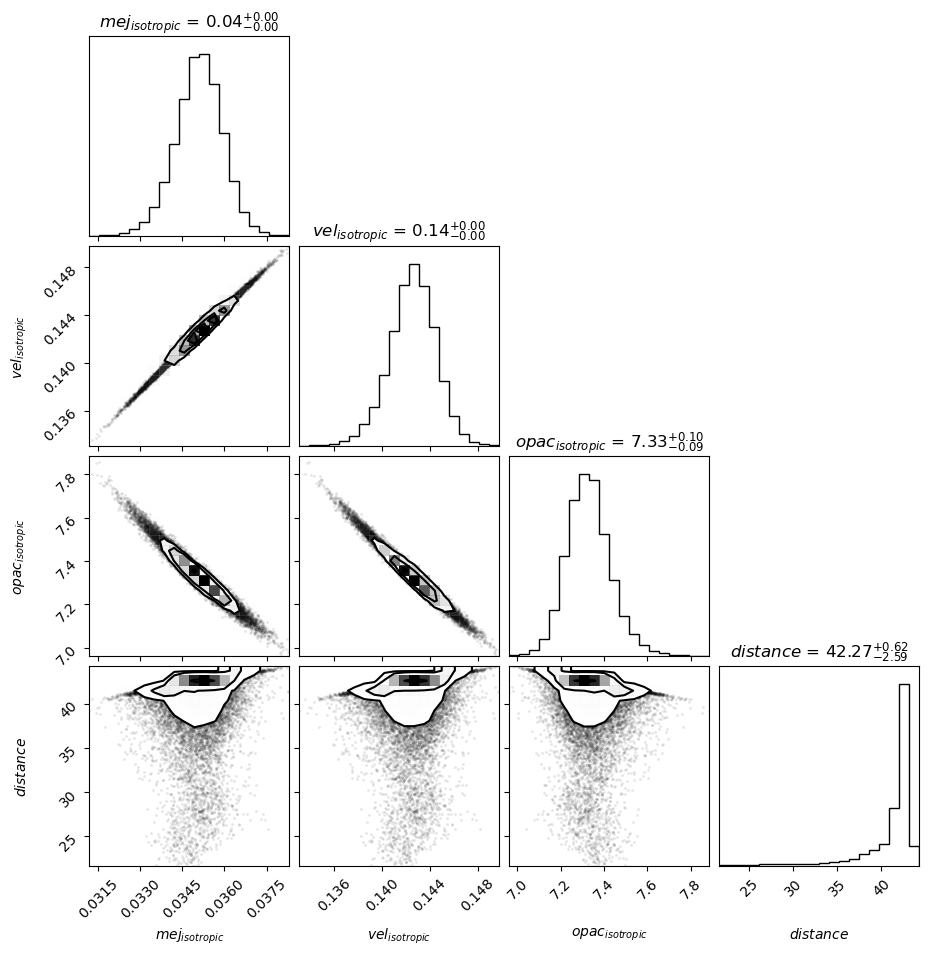

In [5]:
# here we resort to corner to show the results
import numpy as np
import corner

posterior_file = './posterior.dat'
posterior      = np.genfromtxt(posterior_file, names=True)

fig = corner.corner(np.vstack([posterior['mej_isotropic'], posterior['vel_isotropic'], posterior['opac_isotropic'], posterior['distance']]).T, 
                  labels=[r"$mej_{isotropic}$", r"$vel_{isotropic}$", r"$opac_{isotropic}$", r"$distance$"], show_titles=True, title_kwargs={"fontsize": 12})